In [1]:
import os
import pandas as pd
import numpy as np
import pickle
from assets.CrabNet.kingcrab import CrabNet
from assets.CrabNet.model import Model
import matplotlib.pyplot as plt
from omegaconf import OmegaConf
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
cfg = OmegaConf.load('conf/model/crabnet.yaml')

plt.rcParams['font.size'] = 14
plt.rcParams['figure.dpi']= 400

/home/fedeotto/miniconda3/envs/nsg/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
with open('saved_attentions/att_Zn0.95Al0.05O.pkl', 'rb') as f:
    data_znoal = pickle.load(f)

with open('saved_attentions/att_Sn0.96In0.04O2.pkl', 'rb') as f:
    data_snoin = pickle.load(f)
    
with open('saved_attentions/att_Sn0.99Ga0.01O2.pkl', 'rb') as f:
    data_snoga = pickle.load(f)

In [3]:
formulae_znoal, att_znoal = data_znoal
formulae_snoin, att_snoin = data_snoin
formulae_snoga, att_snoga = data_snoga

In [4]:
df_znoal = pd.DataFrame({'formula': formulae_znoal, 'target': [0 for _ in range(len(formulae_znoal))]})
df_snota = pd.DataFrame({'formula': formulae_snoin, 'target': [0 for _ in range(len(formulae_snoin))]})
df_snoga = pd.DataFrame({'formula': formulae_snoga, 'target': [0 for _ in range(len(formulae_snoga))]})

df_znoal = df_znoal.iloc[:3].reset_index(drop=True)
df_snota = df_snota.iloc[:3].reset_index(drop=True)
df_snoga = df_snoga.iloc[:3].reset_index(drop=True)

formulae_znoal = df_znoal['formula'].tolist()[:3]
formulae_snota = df_snota['formula'].tolist()[:3]
formulae_snoga = df_snoga['formula'].tolist()[:3]

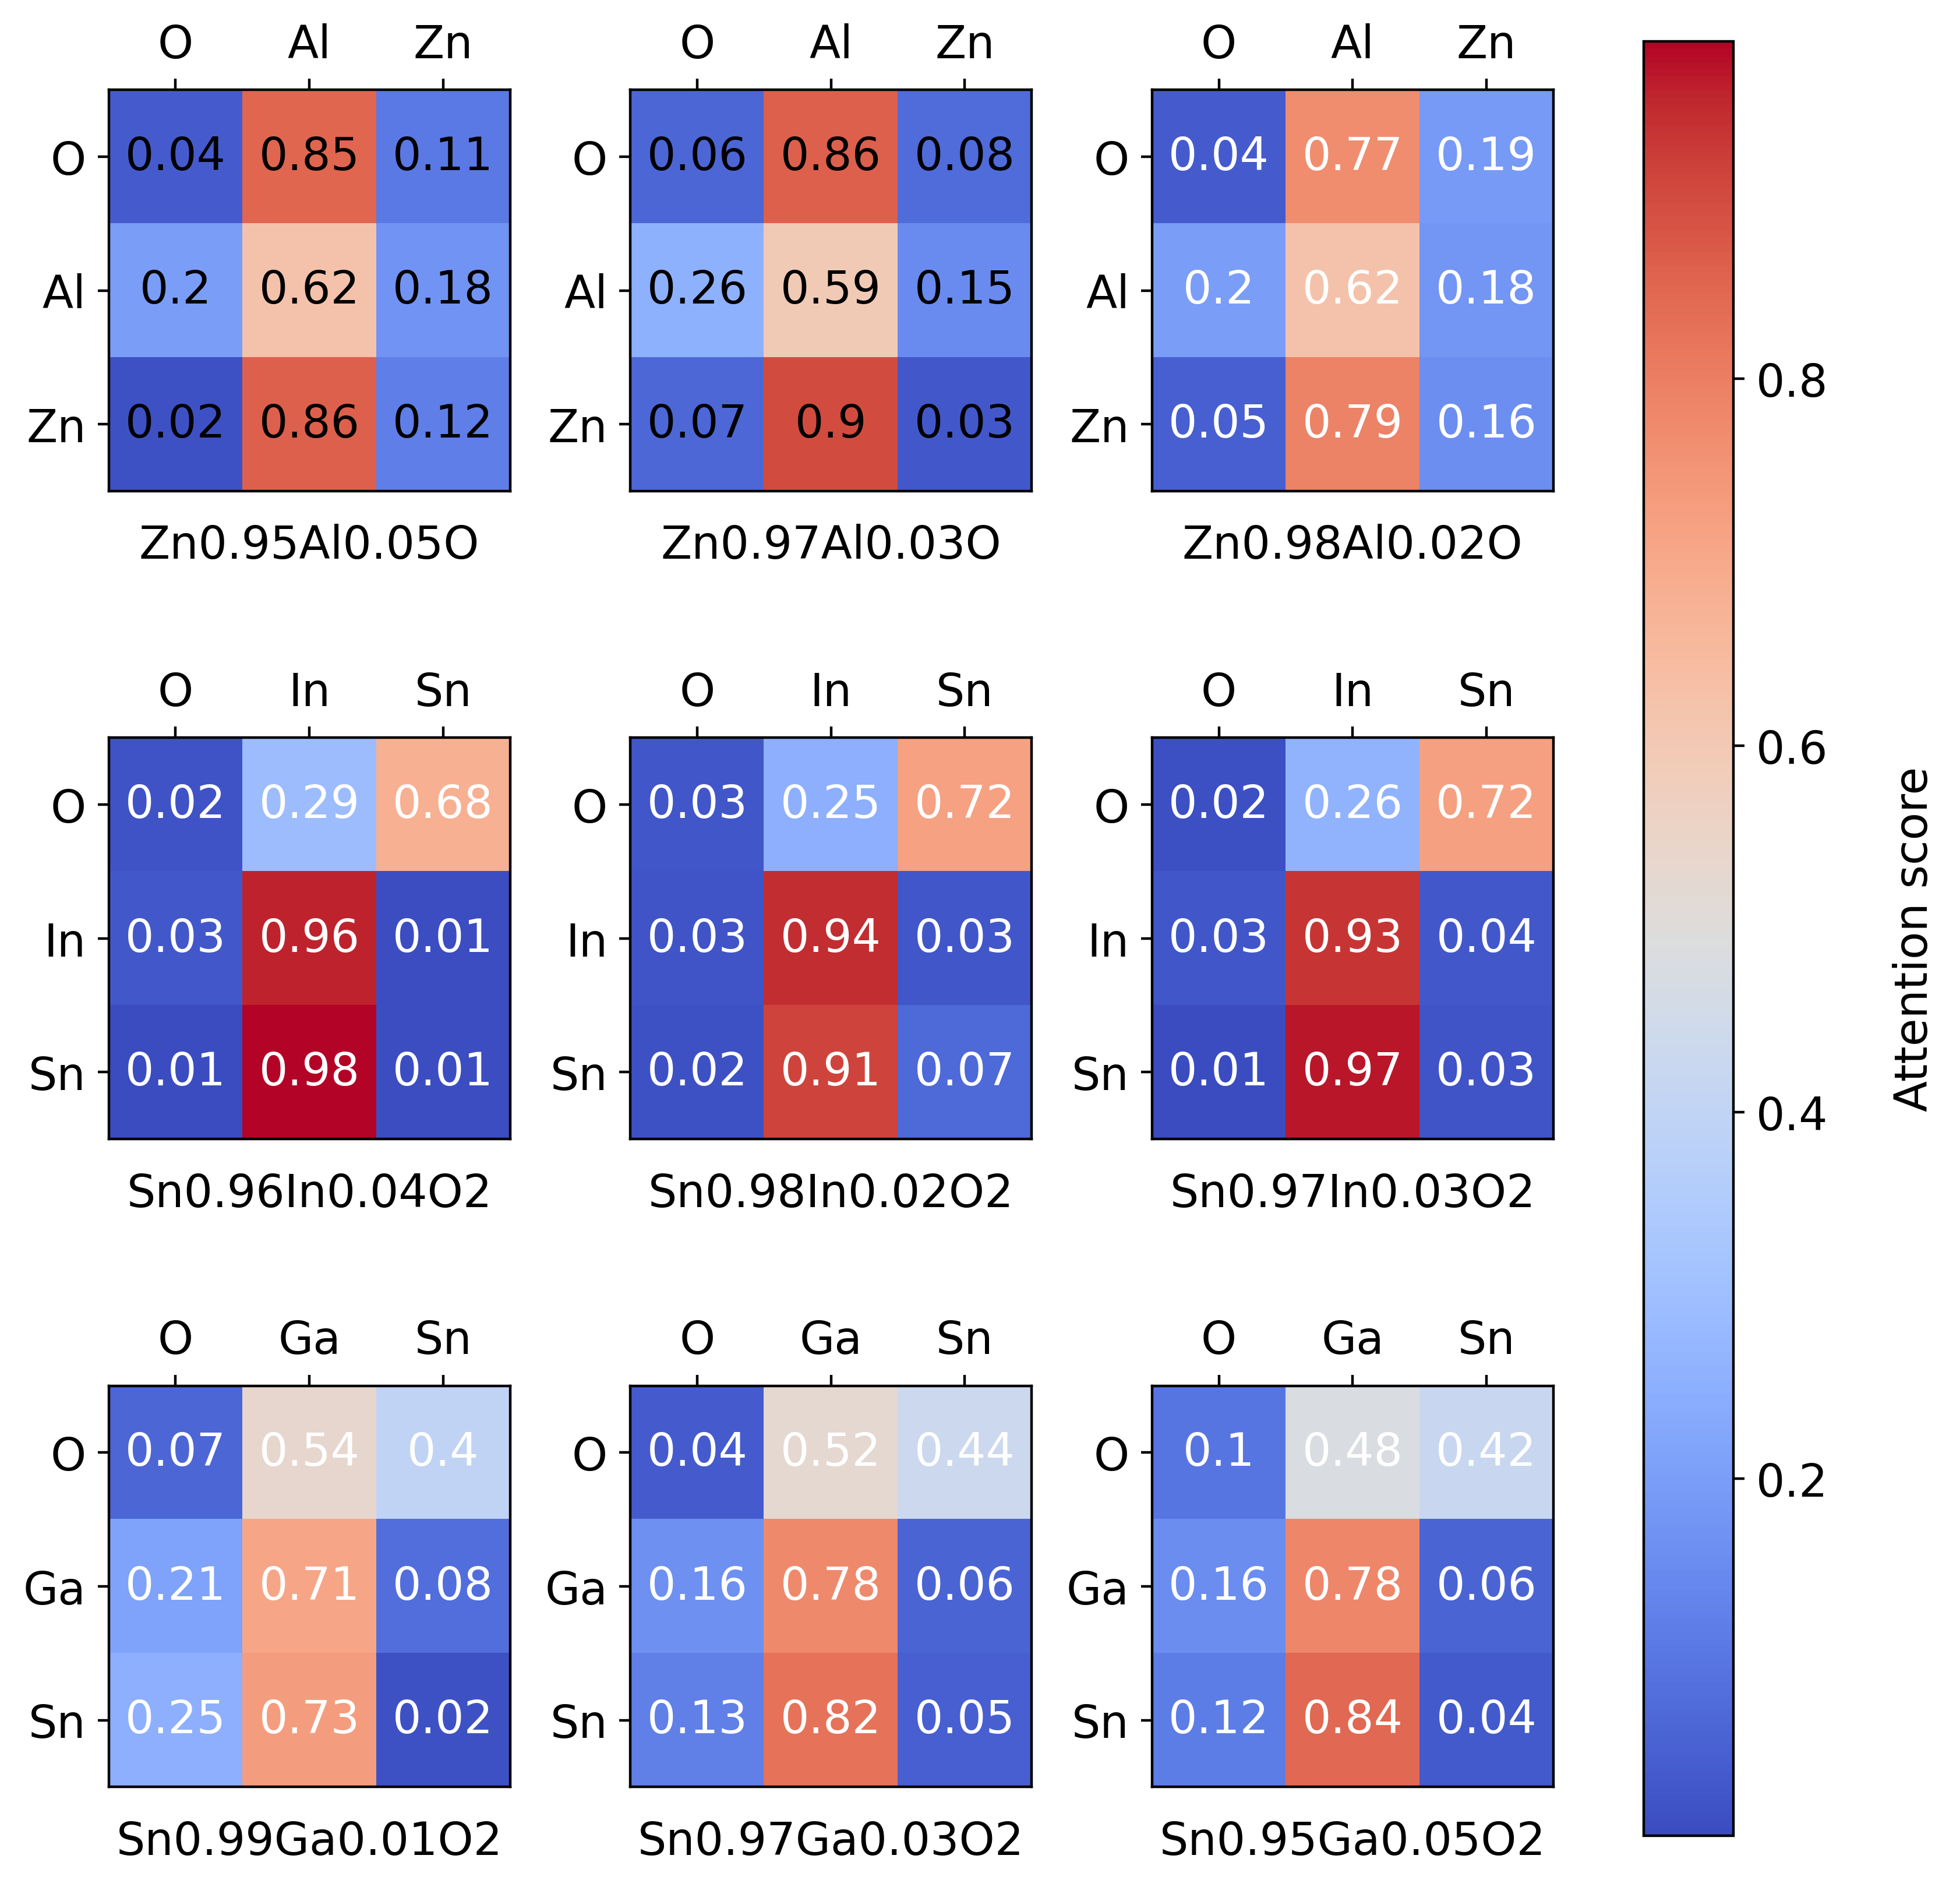

In [9]:
# Assume att is a list of 2D arrays
fig, axs = plt.subplots(3, 3, figsize=(10, 10))
plt.subplots_adjust(wspace=0.3, hspace=0.3)

# Determine the global min and max, assumed all att_* are available
global_vmin = min(att_znoal.min(), att_snoin.min(), att_snoga.min())
global_vmax = max(att_znoal.max(), att_snoin.max(), att_snoga.max())

# Placing xticks on top
axs[0][0].xaxis.tick_top()
axs[0][1].xaxis.tick_top()
axs[0][2].xaxis.tick_top()

axs[1][0].xaxis.tick_top()
axs[1][1].xaxis.tick_top()
axs[1][2].xaxis.tick_top()

axs[2][0].xaxis.tick_top()
axs[2][1].xaxis.tick_top()
axs[2][2].xaxis.tick_top()

labels_znoal = ['O','Al','Zn']
axs[0][0].imshow(att_znoal[0],cmap='coolwarm', vmin=global_vmin, vmax=global_vmax)
axs[0][0].set_xticks(np.arange(len(labels_znoal)))
axs[0][0].set_yticks(np.arange(len(labels_znoal)))
axs[0][0].set_xticklabels(labels_znoal)
axs[0][0].set_yticklabels(labels_znoal)
axs[0][0].set_xlabel(df_znoal['formula'][0], labelpad=10)
axs[0][0].title.set_fontsize(12)

for j in range(len(formulae_znoal)):
    for k in range(len(formulae_znoal)):
        text = axs[0][0].text(k, j, round(att_znoal[0][j, k].item(),2), ha="center", va="center", color='white')

labels_znoal = ['O','Al','Zn']
axs[0][1].imshow(att_znoal[1],cmap='coolwarm', vmin=global_vmin, vmax=global_vmax)
axs[0][1].set_xticks(np.arange(len(labels_znoal)))
axs[0][1].set_yticks(np.arange(len(labels_znoal)))
axs[0][1].set_xticklabels(labels_znoal)
axs[0][1].set_yticklabels(labels_znoal)
axs[0][1].set_xlabel(df_znoal['formula'][1], labelpad=10)
axs[0][1].title.set_fontsize(12)

for j in range(len(formulae_znoal)):
    for k in range(len(formulae_znoal)):
        text = axs[0][1].text(k, j, round(att_znoal[1][j, k].item(),2), ha="center", va="center", color='white')

labels_znoal = ['O','Al', 'Zn']
axs[0][2].imshow(att_znoal[2],cmap='coolwarm', vmin=global_vmin, vmax=global_vmax)
axs[0][2].set_xticks(np.arange(len(labels_znoal)))
axs[0][2].set_yticks(np.arange(len(labels_znoal)))
axs[0][2].set_xticklabels(labels_znoal)
axs[0][2].set_yticklabels(labels_znoal)
axs[0][2].set_xlabel(df_znoal['formula'][2], labelpad=10)
axs[0][2].title.set_fontsize(12)

for j in range(len(formulae_znoal)):
    for k in range(len(formulae_znoal)):
        text = axs[0][2].text(k, j, round(att_znoal[2][j, k].item(),2), ha="center", va="center", color='white')

#SnoTi
labels_snota = ['O','In', 'Sn']
axs[1][0].imshow(att_snoin[0],cmap='coolwarm', vmin=global_vmin, vmax=global_vmax)
axs[1][0].set_xticks(np.arange(len(labels_snota)))
axs[1][0].set_yticks(np.arange(len(labels_snota)))
axs[1][0].set_xticklabels(labels_snota)
axs[1][0].set_yticklabels(labels_snota)
axs[1][0].set_xlabel(df_snota['formula'][0], labelpad=10)
axs[1][0].title.set_fontsize(12)

for j in range(len(formulae_snota)):
    for k in range(len(formulae_snota)):
        text = axs[1][0].text(k, j, round(att_snoin[0][j, k].item(),2), ha="center", va="center", color='white')

labels_snota = ['O','In', 'Sn']
axs[1][1].imshow(att_snoin[1],cmap='coolwarm', vmin=global_vmin, vmax=global_vmax)
axs[1][1].set_xticks(np.arange(len(labels_snota)))
axs[1][1].set_yticks(np.arange(len(labels_snota)))
axs[1][1].set_xticklabels(labels_snota)
axs[1][1].set_yticklabels(labels_snota)
axs[1][1].set_xlabel(df_snota['formula'][1], labelpad=10)
axs[1][1].title.set_fontsize(12)

for j in range(len(formulae_snota)):
    for k in range(len(formulae_snota)):
        text = axs[1][1].text(k, j, round(att_snoin[1][j, k].item(),2), ha="center", va="center", color='white')

axs[1][2].imshow(att_snoin[2],cmap='coolwarm', vmin=global_vmin, vmax=global_vmax)
axs[1][2].set_xticks(np.arange(len(labels_snota)))
axs[1][2].set_yticks(np.arange(len(labels_snota)))
axs[1][2].set_xticklabels(labels_snota)
axs[1][2].set_yticklabels(labels_snota)
axs[1][2].set_xlabel(df_snota['formula'][2], labelpad=10)
axs[1][2].title.set_fontsize(12)

for j in range(len(formulae_snota)):
    for k in range(len(formulae_snota)):
        text = axs[1][2].text(k, j, round(att_snoin[2][j, k].item(),2), ha="center", va="center", color='white')

#SnoGa
labels_snoga = ['O','Ga','Sn']
axs[2][0].imshow(att_snoga[0],cmap='coolwarm', vmin=global_vmin, vmax=global_vmax)
axs[2][0].set_xticks(np.arange(len(labels_snoga)))
axs[2][0].set_yticks(np.arange(len(labels_snoga)))
axs[2][0].set_xticklabels(labels_snoga)
axs[2][0].set_yticklabels(labels_snoga)
axs[2][0].set_xlabel(df_snoga['formula'][0], labelpad=10)
axs[2][0].title.set_fontsize(12)

for j in range(len(formulae_snoga)):
    for k in range(len(formulae_snoga)):
        text = axs[2][0].text(k, j, round(att_snoga[0][j, k].item(),2), ha="center", va="center", color='white')

axs[2][1].imshow(att_snoga[1],cmap='coolwarm', vmin=global_vmin, vmax=global_vmax)
axs[2][1].set_xticks(np.arange(len(labels_snoga)))
axs[2][1].set_yticks(np.arange(len(labels_snoga)))
axs[2][1].set_xticklabels(labels_snoga)
axs[2][1].set_yticklabels(labels_snoga)
axs[2][1].set_xlabel(df_snoga['formula'][1], labelpad=10)
axs[2][1].title.set_fontsize(12)

for j in range(len(formulae_snoga)):
    for k in range(len(formulae_snoga)):
        text = axs[2][1].text(k, j, round(att_snoga[1][j, k].item(),2), ha="center", va="center", color='white')

im = axs[2][2].imshow(att_snoga[2],cmap='coolwarm', vmin=global_vmin, vmax=global_vmax)
axs[2][2].set_xticks(np.arange(len(labels_snoga)))
axs[2][2].set_yticks(np.arange(len(labels_snoga)))
axs[2][2].set_xticklabels(labels_snoga)
axs[2][2].set_yticklabels(labels_snoga)
axs[2][2].set_xlabel(df_snoga['formula'][2], labelpad=10)
axs[2][2].title.set_fontsize(12)

for j in range(len(formulae_snoga)):
    for k in range(len(formulae_snoga)):
        text = axs[2][2].text(k, j, round(att_snoga[2][j, k].item(),2), ha="center", va="center", color='white')

cbar = fig.colorbar(im, ax=axs.ravel().tolist(), orientation='vertical')
cbar.set_label('Attention score', labelpad=20)

Mean attention score for dopants: 0.5018463
Median attention score for dopants: 0.52927744
Mean attention score for non-dopants: 0.19822843
Median attention score for non-dopants: 0.124008715
Mann-Whitney U test statistic: 14077.0
p-value: 9.264826103244987e-16


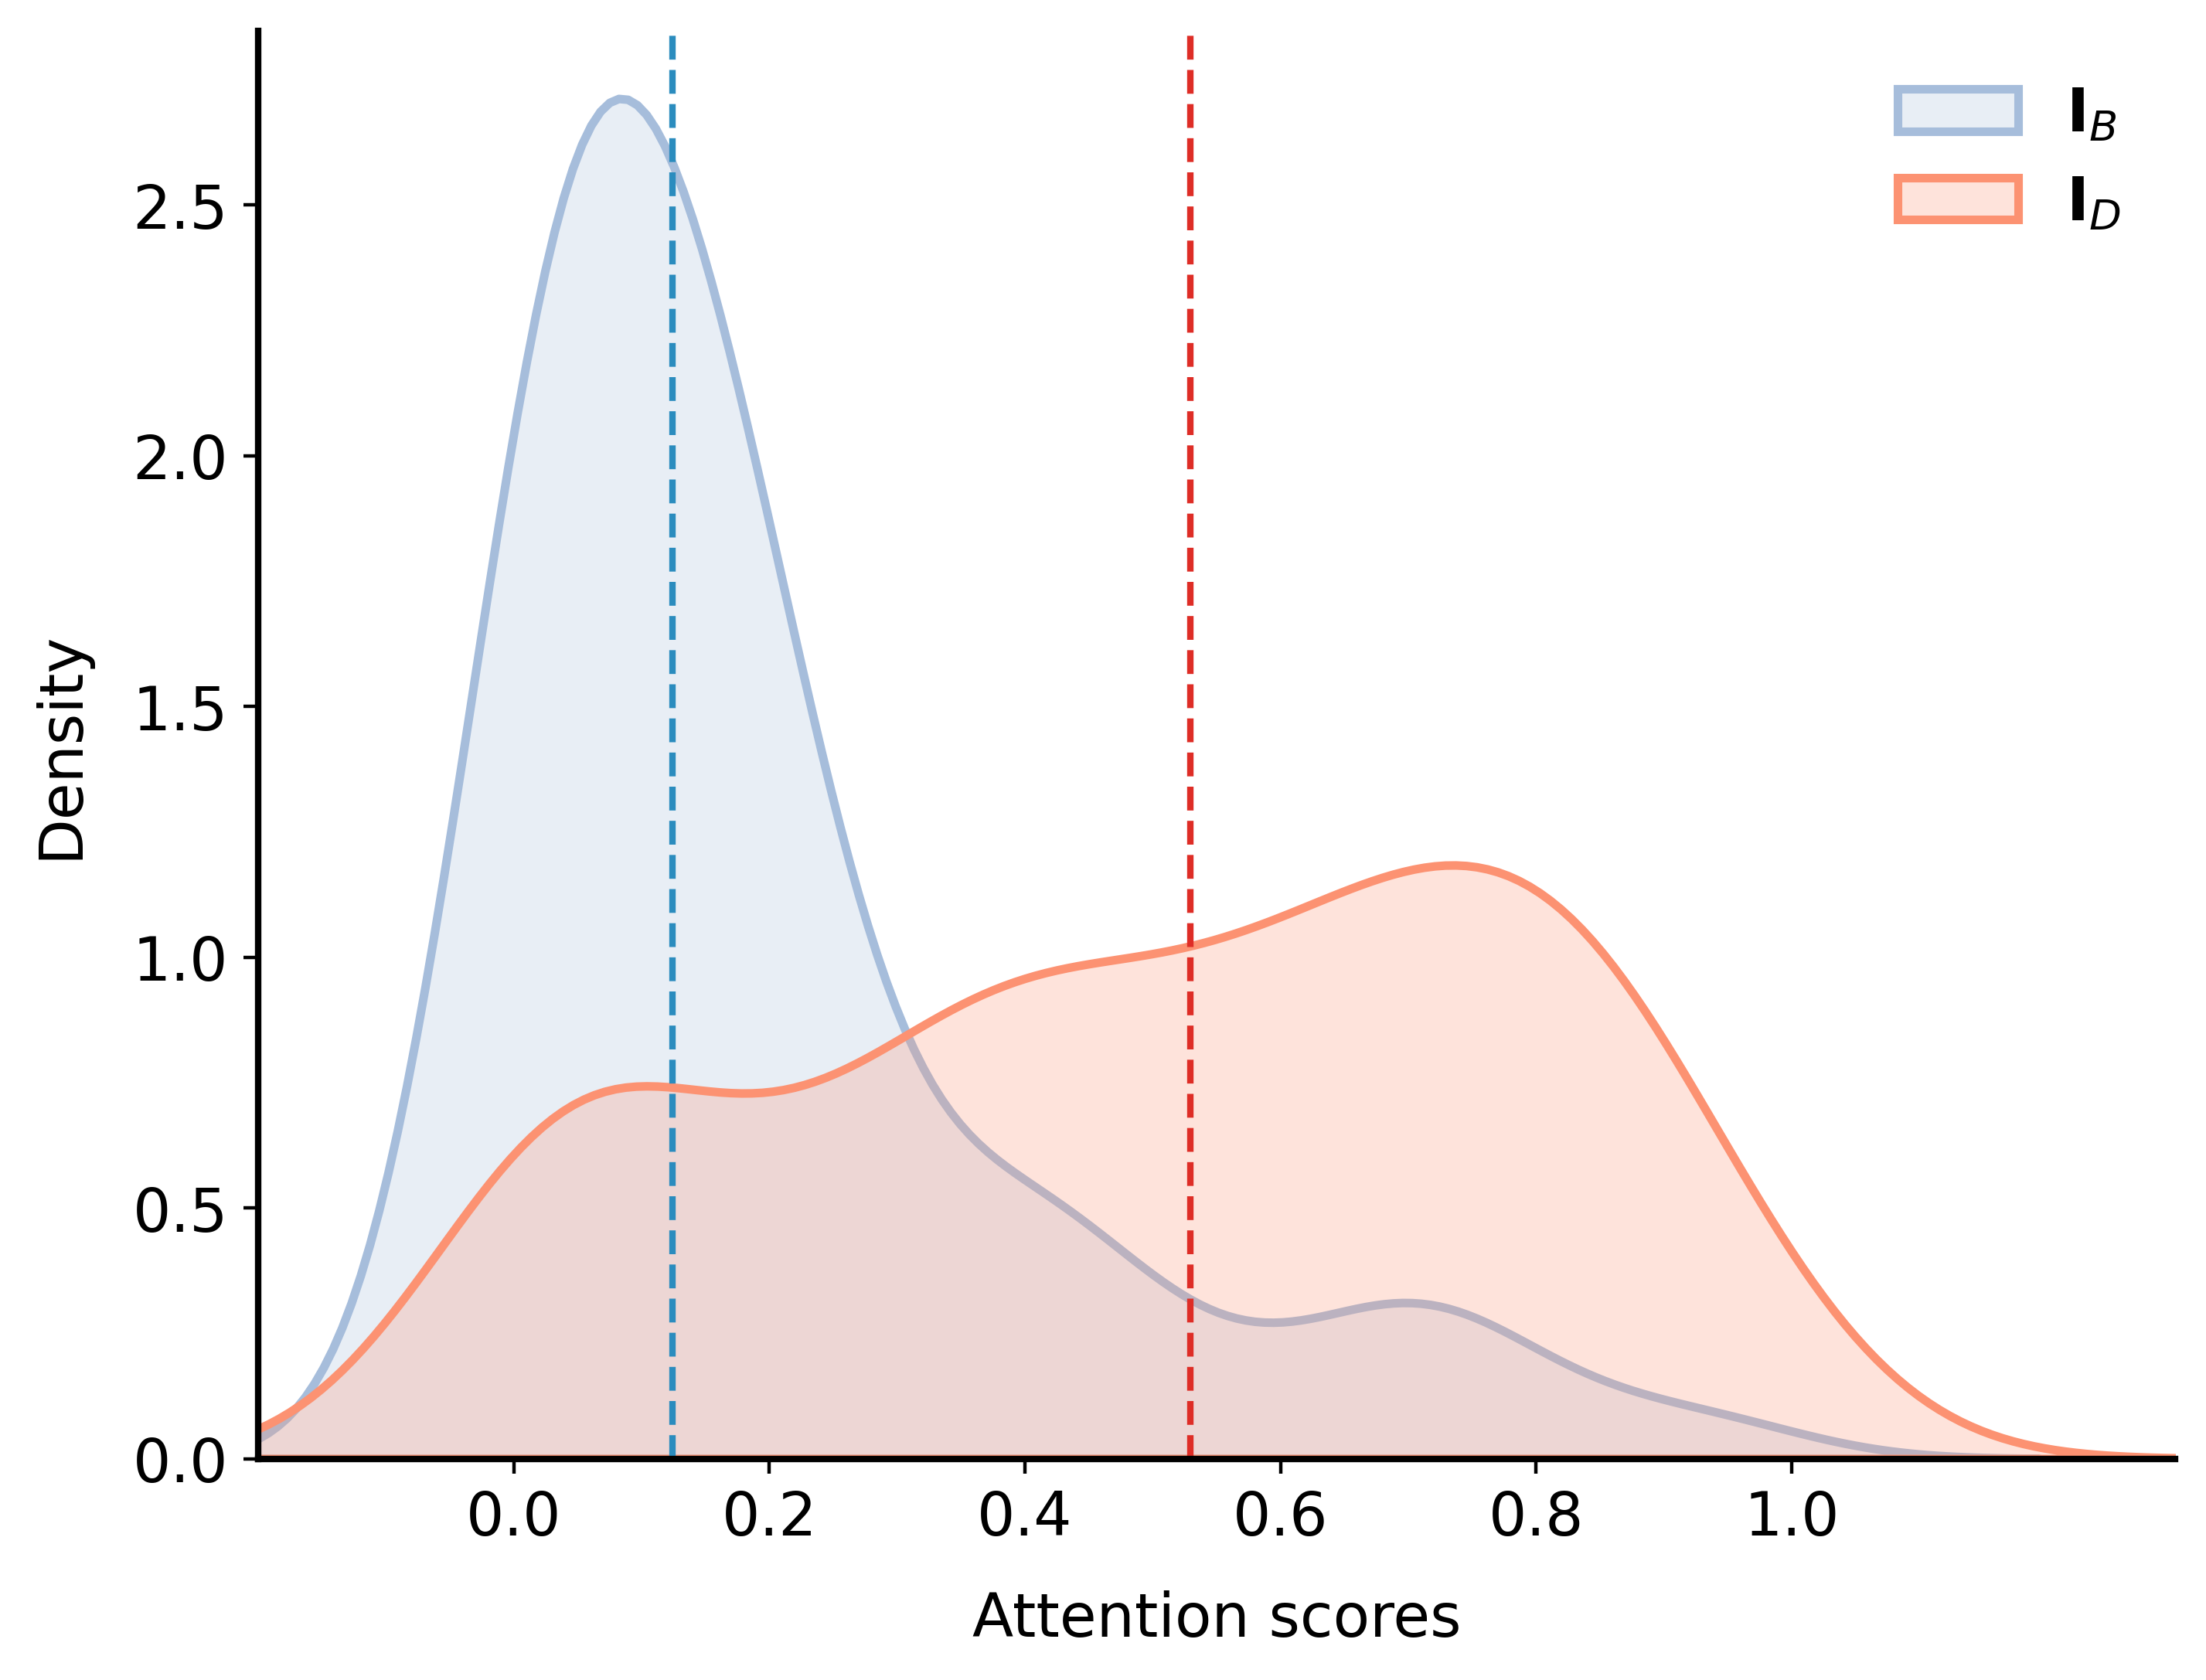

In [9]:
#Plotting density attention scores for dopants vs no dopants
from common.chem import _element_composition, all_symbols
from collections import OrderedDict
import seaborn as sns
from scipy.stats import mannwhitneyu

files = os.listdir('saved_attentions')

att_scores_dopants = []
att_scores_no_dopants = []

for file in files:
    with open(f'saved_attentions/{file}', 'rb') as f:
        data = pickle.load(f)

    formulae, att = data
    for formula, att_map in zip(formulae, att):
        elems_dict = _element_composition(formula)
        atomic_n_dict = {elem: all_symbols.index(elem)+1 for elem in elems_dict.keys()}

        #sorting atomic_n_dict
        ord_atomic_n_dict = OrderedDict(sorted(atomic_n_dict.items(), key=lambda item: item[1]))
        ord_elems_dict = OrderedDict((key, elems_dict[key]) for key in ord_atomic_n_dict.keys())
        ord_elems = list(ord_elems_dict.keys())
        if len(ord_elems_dict) == 4:
            dopant = ['Al','Sn']
            idx_dopant = [ord_elems.index(dop) for dop in dopant]
        else:
            #dopant is the one with smallest atomic percentage
            dopant = [min(ord_elems_dict, key=ord_elems_dict.get)]
            idx_dopant = [ord_elems.index(dop) for dop in dopant]

        #Extracting attention scores for dopants
        att_scores_dopants.append(att_map[:,idx_dopant].flatten())
        att_scores_no_dopants.append(att_map[:,[i for i in range(len(ord_elems)) if i not in idx_dopant]].flatten())

att_scores_dopants = np.hstack(att_scores_dopants)
att_scores_no_dopants = np.hstack(att_scores_no_dopants)

#sampling equal number for non-dopants
np.random.seed(42)
idx = np.random.choice(len(att_scores_no_dopants), len(att_scores_dopants), replace=False)
att_scores_no_dopants = att_scores_no_dopants[idx]

# Plotting
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

# Filled histograms
# ax.hist(att_scores_no_dopants, bins=25, color='#deebf7', alpha=0.6)
# ax.hist(att_scores_dopants, bins=25, color='#bcbddc', alpha=0.6)
sns.kdeplot(att_scores_no_dopants, color='#a6bddb', linewidth=2., fill=True, ax=ax)
sns.kdeplot(att_scores_dopants, color='#fc9272',linewidth=2., fill=True, ax=ax)
ax.legend(labels=[r'$\mathbf{I}_{B}$', r'$\mathbf{I}_D$'], frameon=False)

ax.set_xlabel('Attention scores', labelpad=10)
ax.set_ylabel('Density', labelpad=10)
ax.set_xlim([-0.2, 1.3])
ax.set_xticks(np.arange(0, 1.2, 0.2))
# ax.set_xticklabels(np.arange(0, 1.5, 0.6))

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# New code to set linewidth of spines
ax.spines['left'].set_linewidth(1.5)
ax.spines['bottom'].set_linewidth(1.5)

# Mean lines
mean_att_dopants = np.mean(att_scores_dopants)
median_att_dopants = np.median(att_scores_dopants)
mean_att_no_dopants = np.mean(att_scores_no_dopants)
median_att_no_dopants = np.median(att_scores_no_dopants)

ax.axvline(median_att_dopants, linestyle='--', color='#de2d26')
ax.axvline(median_att_no_dopants, linestyle='--', color='#2b8cbe')

# Statistics
print("Mean attention score for dopants:", mean_att_dopants)
print("Median attention score for dopants:", np.median(att_scores_dopants))
print("Mean attention score for non-dopants:", mean_att_no_dopants)
print("Median attention score for non-dopants:", np.median(att_scores_no_dopants))

# Mann-Whitney U Test
u_statistic, p_value = mannwhitneyu(att_scores_dopants, att_scores_no_dopants, alternative='two-sided')
print(f'Mann-Whitney U test statistic: {u_statistic}')
print(f'p-value: {p_value}')

plt.show()
